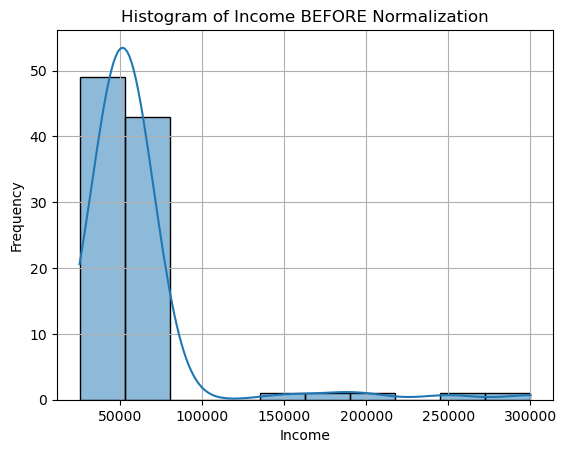

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Step 1: Construct a histogram for the ‘age' column
sns.histplot(data['income'].dropna(), bins=10, kde=True) # kde=True adds the KDE curve
# Step 2: Add titles and labels
plt.title('Histogram of Income BEFORE Normalization')
plt.xlabel('Income')
plt.ylabel('Frequency')
# Step 3: Show the plot
plt.grid(True)
plt.show()

In [24]:
# Using describe() to get basic statistics
data['income'].describe()

count        97.000000
mean      59733.807283
std       39816.965650
min       25283.554999
25%       45406.391005
50%       52544.208433
75%       58696.059201
max      300000.000000
Name: income, dtype: float64

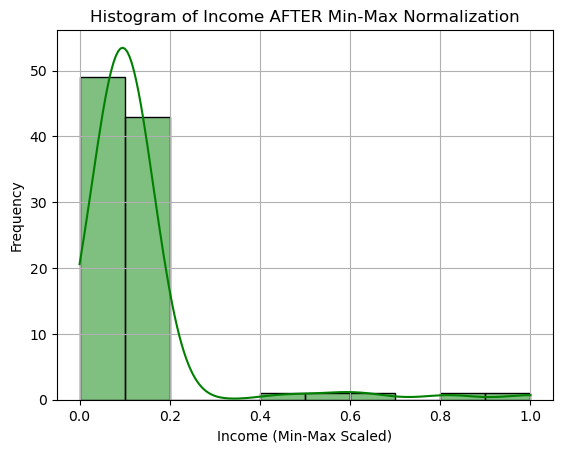

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Construct a histogram for the 'income_min_max_scaled' column
sns.histplot(data['income_min_max_scaled'].dropna(), bins=10, kde=True, color='green')

# Step 2: Add titles and labels
plt.title('Histogram of Income AFTER Min-Max Normalization')
plt.xlabel('Income (Min-Max Scaled)')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.grid(True)
plt.show()


In [25]:
#Min-Max Normalization

from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Reshape the data for use with MinMaxScaler (ignore missing values during transformation)
income_data_reshaped = data[['income']].values.reshape(-1, 1)

# Apply Min-Max Normalization (ignoring NaN values)
income_min_max_scaled = scaler.fit_transform(income_data_reshaped)

# Add the normalized data back into the DataFrame
data['income_min_max_scaled'] = income_min_max_scaled

# Display the first few rows of the normalized 'income' column
print(data[['income', 'income_min_max_scaled']].head())

# Display basic statistics of the normalized column
print("\nBasic Statistics for Min-Max Normalized 'income' column:")
print(data['income_min_max_scaled'].describe())


         income  income_min_max_scaled
0  46154.444558               0.075972
1  60062.928092               0.126601
2  44231.081305               0.068971
3  58356.921121               0.120391
4  38702.931453               0.048848

Basic Statistics for Min-Max Normalized 'income' column:
count    97.000000
mean      0.125403
std       0.144938
min       0.000000
25%       0.073249
50%       0.099232
75%       0.121625
max       1.000000
Name: income_min_max_scaled, dtype: float64


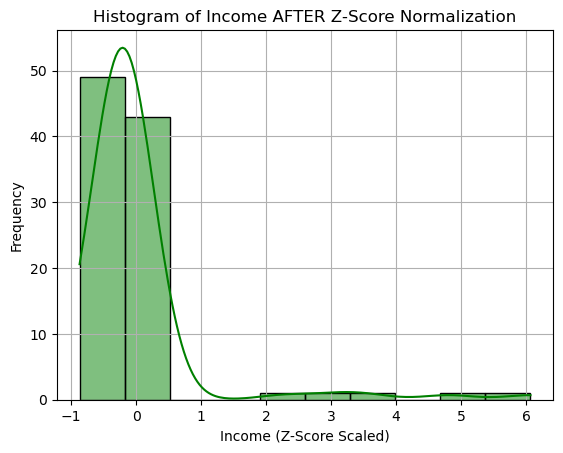

In [36]:
from sklearn.preprocessing import StandardScaler

# Z-Score Normalization
scaler = StandardScaler()
data['income_zscore_scaled'] = scaler.fit_transform(data[['income']])

# Step 1: Construct a histogram for the 'income_zscore_scaled' column
sns.histplot(data['income_zscore_scaled'].dropna(), bins=10, kde=True, color='green')

# Step 2: Add titles and labels
plt.title('Histogram of Income AFTER Z-Score Normalization')
plt.xlabel('Income (Z-Score Scaled)')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.grid(True)
plt.show()


In [26]:
#Z-Score Normalization

from sklearn.preprocessing import StandardScaler

# Reshape the data for use with StandardScaler (including NaN values)
income_data_reshaped = data[['income']].values.reshape(-1, 1)

# Initialize the StandardScaler (Z-Score Normalization)
scaler = StandardScaler()

# Apply Z-Score Normalization (ignoring NaN values during transformation)
income_zscore_scaled = scaler.fit_transform(income_data_reshaped)

# Add the normalized data back into the DataFrame
data['income_zscore_scaled'] = income_zscore_scaled

# Display the first few rows of the normalized 'income' column
print(data[['income', 'income_zscore_scaled']].head())

# Display basic statistics of the normalized column
print("\nBasic Statistics for Z-Score Normalized 'income' column:")
print(data['income_zscore_scaled'].describe())


         income  income_zscore_scaled
0  46154.444558             -0.342816
1  60062.928092              0.008309
2  44231.081305             -0.391372
3  58356.921121             -0.034760
4  38702.931453             -0.530933

Basic Statistics for Z-Score Normalized 'income' column:
count    9.700000e+01
mean     8.240831e-17
std      1.005195e+00
min     -8.697101e-01
25%     -3.617012e-01
50%     -1.815042e-01
75%     -2.619836e-02
max      6.065614e+00
Name: income_zscore_scaled, dtype: float64


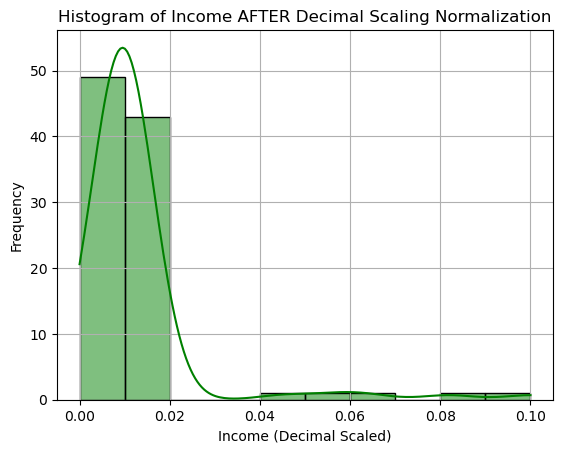

In [39]:
# Decimal Scaling Normalization
max_abs_value = data['income'].abs().max()
data['income_decimal_scaled'] = data['income'] / (10 ** len(str(int(max_abs_value))))

# Step 1: Construct a histogram for the 'income_decimal_scaled' column
sns.histplot(data['income_decimal_scaled'].dropna(), bins=10, kde=True, color='green')

# Step 2: Add titles and labels
plt.title('Histogram of Income AFTER Decimal Scaling Normalization')
plt.xlabel('Income (Decimal Scaled)')
plt.ylabel('Frequency')

# Step 3: Show the plot
plt.grid(True)
plt.show()


In [27]:
#Decimal Scaling

import numpy as np
# Drop missing values in the 'age' column
income_data = data['income'].dropna()
# Step 1: Find the maximum absolute value in the 'age' column
max_abs_value = np.abs(income_data).max()
# Step 2: Calculate the scaling factor (power of 10)
scaling_factor = 10 ** np.ceil(np.log10(max_abs_value))
# Step 3: Apply Decimal Scaling Normalization
data['income_decimal_scaled'] = income_data / scaling_factor
# Display the first few rows of the normalized 'age' column
print(data[['income', 'income_decimal_scaled']].head())
# Display basic statistics of the normalized column
print("\nBasic Statistics for Decimal Scaled 'income' column:")
print(data['income_decimal_scaled'].describe())

         income  income_decimal_scaled
0  46154.444558               0.046154
1  60062.928092               0.060063
2  44231.081305               0.044231
3  58356.921121               0.058357
4  38702.931453               0.038703

Basic Statistics for Decimal Scaled 'income' column:
count    97.000000
mean      0.059734
std       0.039817
min       0.025284
25%       0.045406
50%       0.052544
75%       0.058696
max       0.300000
Name: income_decimal_scaled, dtype: float64


In [29]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Step 1: Initialize the MinMaxScaler
scaler = MinMaxScaler()
# Step 2: Select only the numerical columns for normalization
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
# Step 3: Apply Min-Max Normalization to all numerical columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
# Display the first few rows after normalization
print("\nData after Min-Max Normalization:")
data


Data after Min-Max Normalization:


,age,income,height,weight,score,gender,target_class
0,0.768172,0.075972,0.481738,0.245158,0.265306,Female,Healthy
1,0.111236,0.126601,0.430721,0.015074,0.591837,Male,Healthy
2,0.417479,0.068971,0.319678,0.312837,1.000000,Male,Healthy
3,0.499180,0.120391,0.197719,0.252171,0.061224,Male,Unhealthy
4,0.421726,0.048848,0.667911,0.228565,0.346939,Female,Unhealthy
...,...,...,...,...,...,...,...
95,0.415522,0.453982,0.577671,0.143665,0.346939,Female,Healthy
96,0.202740,0.563186,0.409303,0.154857,0.102041,NaN,Unhealthy
97,0.306662,0.635988,0.364040,0.169943,0.734694,Female,Healthy
98,0.436611,0.817994,0.548880,0.781998,0.959184,Male,Healthy


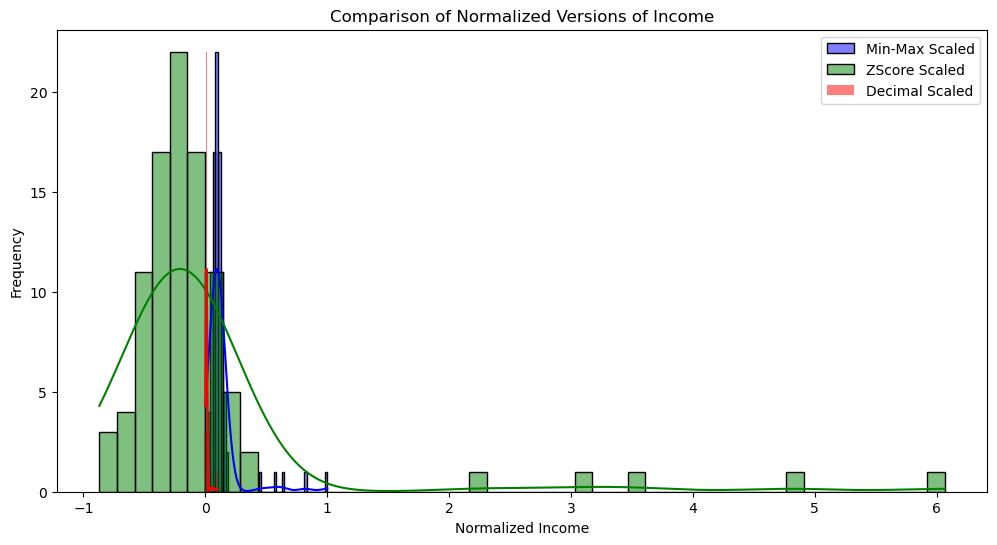

In [41]:
# Plotting all three normalized versions of the 'age' column
plt.figure(figsize=(12, 6))
# Min-Max Normalization
sns.histplot(data['income_min_max_scaled'], color='blue',
label='Min-Max Scaled', kde=True)
# Z-Score Normalization
sns.histplot(data['income_zscore_scaled'], color='green', label='ZScore Scaled', kde=True)
# Decimal Scaling Normalization
sns.histplot(data['income_decimal_scaled'], color='red',
label='Decimal Scaled', kde=True)
# Add title and labels
plt.title('Comparison of Normalized Versions of Income')
plt.xlabel('Normalized Income')
plt.ylabel('Frequency')
# Show the legend
plt.legend()
# Show the plot
plt.show()

In [42]:
#Label Encoding

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name='dataset')
# Display the original data (first few rows)
#print("Original Data:")
#print(data[['gender']].head())
# Step 1: Apply Label Encoding to 'Gender'
label_encoder = LabelEncoder()
data['gender_label_encoded'] = label_encoder.fit_transform(data['gender'])
# Display the first few rows after Label Encoding
print("\nData after Label Encoding:")
print(data[['gender', 'gender_label_encoded']].head())


Data after Label Encoding:
   gender  gender_label_encoded
0  Female                     0
1    Male                     1
2    Male                     1
3    Male                     1
4  Female                     0


In [43]:
data

,age,income,height,weight,score,gender,target_class,gender_label_encoded
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy,0
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy,1
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy,1
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy,1
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy,0
...,...,...,...,...,...,...,...,...
95,34.339202,150000.000000,168.475817,62.157100,67,Female,Healthy,0
96,22.889838,180000.000000,159.602403,63.697198,55,NaN,Unhealthy,2
97,28.481639,200000.000000,157.216953,65.773231,86,Female,Healthy,0
98,35.473987,250000.000000,166.958453,150.000000,97,Male,Healthy,1


In [46]:
#One Hot Encoding

import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Step 1: Apply One-Hot Encoding to 'Gender' and keep the original 'gender' column
one_hot_encoded_gender = pd.get_dummies(data['gender'], prefix='gender')
# Concatenate the one-hot encoded columns with the original data
data = pd.concat([data, one_hot_encoded_gender], axis=1)
# Display the first 10 rows after One-Hot Encoding, keeping the original 'gender' column
print("\nData after One-Hot Encoding (with original 'gender' column retained):")
print(data[['gender', 'gender_Female', 'gender_Male']].head(10))


Data after One-Hot Encoding (with original 'gender' column retained):
   gender  gender_Female  gender_Male
0  Female              1            0
1    Male              0            1
2    Male              0            1
3    Male              0            1
4  Female              1            0
5  Female              1            0
6    Male              0            1
7  Female              1            0
8  Female              1            0
9    Male              0            1


In [47]:
data

,age,income,height,weight,score,gender,target_class,gender_Female,gender_Male
0,53.314588,46154.444558,163.419921,76.123791,63,Female,Healthy,1,0
1,17.966176,60062.928092,160.731189,44.461246,79,Male,Healthy,0,1
2,34.444523,44231.081305,154.878956,85.437335,99,Male,Healthy,0,1
3,38.840654,58356.921121,148.451433,77.088962,53,Male,Unhealthy,0,1
4,34.673053,38702.931453,173.231706,73.840446,67,Female,Unhealthy,1,0
...,...,...,...,...,...,...,...,...,...
95,34.339202,150000.000000,168.475817,62.157100,67,Female,Healthy,1,0
96,22.889838,180000.000000,159.602403,63.697198,55,NaN,Unhealthy,0,0
97,28.481639,200000.000000,157.216953,65.773231,86,Female,Healthy,1,0
98,35.473987,250000.000000,166.958453,150.000000,97,Male,Healthy,0,1


# SECOND LAB

In [12]:
#Univariate - Descriptive Statistic

import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
data.describe()

,age,income,height,weight,score
count,95.000000,97.000000,98.000000,98.000000,100.000000
mean,33.702332,59733.807283,163.793065,73.594387,73.680000
std,9.730129,39816.965650,10.086378,19.716504,15.405548
min,11.980788,25283.554999,138.031134,42.386887,50.000000
25%,26.391512,45406.391005,157.892797,61.711524,59.750000
50%,33.876720,52544.208433,163.488158,72.247831,73.500000
75%,40.214783,58696.059201,170.671696,83.135555,86.250000
max,65.788808,300000.000000,190.733598,180.000000,99.000000


In [2]:
# Get the descriptive statistics using describe()
descriptive_stats = data[['age', 'income', 'height', 'weight', 'score']].describe()
# Calculate the Mode
modes = data[['age', 'income', 'height', 'weight', 'score']].mode().iloc[0]
# Calculate the Range
ranges = data[['age', 'income', 'height', 'weight', 'score']].max() - data[['age', 'income', 'height', 'weight', 'score']].min()
# Calculate the IQR
iqr = data[['age', 'income', 'height', 'weight', 'score']].quantile(0.75) - data[['age', 'income', 'height', 'weight', 'score']].quantile(0.25)
# Convert additional statistics to DataFrame
additional_stats = pd.DataFrame({
 'Mode': modes,
 'Range': ranges,
 'IQR': iqr
})
# Transpose additional_stats to match the format of descriptive_stats
additional_stats = additional_stats.T
# Combine the two DataFrames
combined_stats = pd.concat([descriptive_stats, additional_stats])
# Display the combined statistics
combined_stats

,age,income,height,weight,score
count,95.000000,97.000000,98.000000,98.000000,100.000000
mean,33.702332,59733.807283,163.793065,73.594387,73.680000
std,9.730129,39816.965650,10.086378,19.716504,15.405548
min,11.980788,25283.554999,138.031134,42.386887,50.000000
25%,26.391512,45406.391005,157.892797,61.711524,59.750000
50%,33.876720,52544.208433,163.488158,72.247831,73.500000
75%,40.214783,58696.059201,170.671696,83.135555,86.250000
max,65.788808,300000.000000,190.733598,180.000000,99.000000
Mode,11.980788,25283.554999,138.031134,42.386887,58.000000
Range,53.808020,274716.445001,52.702464,137.613113,49.000000


In [11]:
#Univariate – Steam & Leaf

import pandas as pd

# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")

# Drop any missing values from the 'age' column
age_data = data['age'].dropna()

# Convert ages to integers for simpler stem-and-leaf plot
age_data = age_data.astype(int)

# Create the stem-and-leaf plot
def stem_and_leaf(data):
    stem_leaf_dict = {}

    # Split each number into stem and leaf
    for number in data:
        stem = number // 10  # Stem is the tens digit(s)
        leaf = number % 10   # Leaf is the units digit

        # Append the leaf to the correct stem in the dictionary
        if stem in stem_leaf_dict:
            stem_leaf_dict[stem].append(leaf)
        else:
            stem_leaf_dict[stem] = [leaf]

    # Sort the leaves for each stem
    for stem in stem_leaf_dict:
        stem_leaf_dict[stem].sort()

    # Display the stem-and-leaf plot
    print("Stem | Leaf")
    print("-----|------")
    for stem, leaves in sorted(stem_leaf_dict.items()):
        print(f" {stem} | {' '.join(map(str, leaves))}")

# Generate the stem-and-leaf plot for the age data
stem_and_leaf(age_data)

Stem | Leaf
-----|------
 1 | 1 6 7 8 8 8
 2 | 0 1 1 1 2 3 4 4 4 4 5 5 5 5 5 6 6 6 6 6 7 7 7 8 8 8 8 9 9 9 9 9 9 9
 3 | 0 2 2 2 2 3 3 3 3 4 4 4 4 4 4 4 5 5 5 5 5 5 7 7 7 7 8 8 8
 4 | 0 0 0 0 0 0 0 1 1 1 2 2 2 3 4 4 6 8 9
 5 | 0 1 1 3 4 4
 6 | 5


In [13]:
#Univariate - (Categorical Data Frequency Analysis)

import pandas as pd
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Task 1.1.3: Categorical Data Analysis
# Frequency Table for 'gender'
gender_frequency = data['gender'].value_counts()
# Frequency Table for 'target_class'
target_class_frequency = data['target_class'].value_counts()
# Display the frequency tables
print("Frequency Table for Gender:")
print(gender_frequency)
print("\nFrequency Table for Target Class:")
print(target_class_frequency)
# Mode Calculation for 'gender' and 'target_class'
gender_mode = data['gender'].mode()[0]
target_class_mode = data['target_class'].mode()[0]
# Display the modes
print("\nMode for Gender:", gender_mode)
print("Mode for Target Class:", target_class_mode)

Frequency Table for Gender:
Male      50
Female    45
Name: gender, dtype: int64

Frequency Table for Target Class:
Unhealthy    56
Healthy      44
Name: target_class, dtype: int64

Mode for Gender: Male
Mode for Target Class: Unhealthy


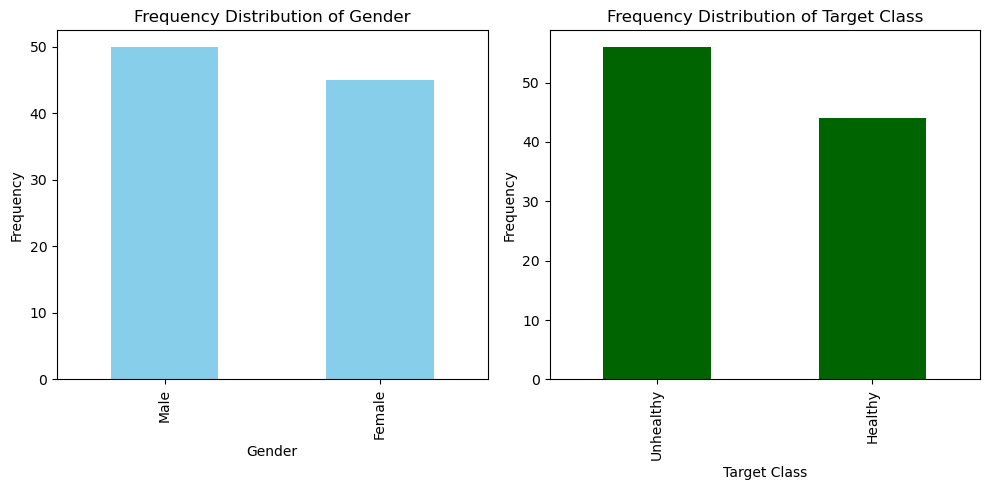

In [16]:
import pandas as pd 
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Frequency Table for 'gender'
gender_frequency = data['gender'].value_counts()
# Frequency Table for 'target_class'
target_class_frequency = data['target_class'].value_counts()
# Plotting the frequency distribution for 'gender'
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
gender_frequency.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
# Plotting the frequency distribution for 'target_class'
plt.subplot(1, 2, 2)
target_class_frequency.plot(kind='bar', color='darkgreen')
plt.title('Frequency Distribution of Target Class')
plt.xlabel('Target Class')
plt.ylabel('Frequency')
# Display the plots
plt.tight_layout()
plt.show()

In [18]:
#Multivariate Analysis – Cross Tabulation Table

import pandas as pd
# Load your dataset
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Create the cross-tabulation table for gender and target_class
cross_tab = pd.crosstab(data['gender'], data['target_class'])
# Display the cross-tabulation table
print(cross_tab)

target_class  Healthy  Unhealthy
gender                          
Female             22         23
Male               22         28


In [20]:
#Multivariate Analysis – Cross Tabulation Table (if numerical data)

import pandas as pd
# Load your dataset
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Step 1: Categorize the 'age' column into age groups
# You can adjust the bins and labels as needed
age_bins = [0, 20, 40, 60, 80] # Example bins for age
age_labels = ['0-20', '21-40', '41-60', '61-80']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)
# Step 2: Create the cross-tabulation table for age_group and target_class
cross_tab = pd.crosstab(data['age_group'], data['target_class'])
# Display the cross-tabulation table
print(cross_tab)

target_class  Healthy  Unhealthy
age_group                       
0-20                5          1
21-40              32         31
41-60               6         19
61-80               0          1


Correlation Matrix:
             age    income    height    weight     score
age     1.000000 -0.113481 -0.063506  0.116232  0.006891
income -0.113481  1.000000 -0.032335  0.520073 -0.023010
height -0.063506 -0.032335  1.000000 -0.186050  0.139858
weight  0.116232  0.520073 -0.186050  1.000000  0.045096
score   0.006891 -0.023010  0.139858  0.045096  1.000000


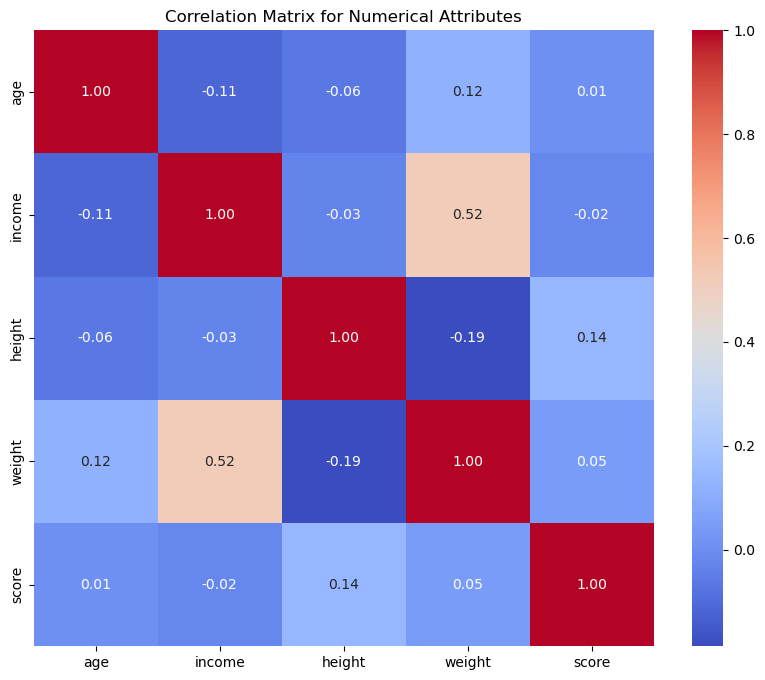

In [21]:
#Multivariate Analysis – Correlation analysis

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Select the numerical columns
numerical_columns = ['age', 'income', 'height', 'weight', 'score']
# Calculate the correlation matrix
correlation_matrix = data[numerical_columns].corr()
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)
# Optionally, visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix for Numerical Attributes')
plt.show()

In [22]:
#Multivariate Analysis – Correlation for categorical data – Chi Square

import pandas as pd
from scipy.stats import chi2_contingency
# Load the data from the Excel file
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Create a contingency table
contingency_table = pd.crosstab(data['gender'], data['target_class'])
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
# Display the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Square Statistic:", chi2)
print("p-value:", p)
print("Degrees of Freedom:", dof)
print("\nExpected Frequencies Table:")
print(pd.DataFrame(expected, index=contingency_table.index, columns=contingency_table.columns))

Contingency Table:
target_class  Healthy  Unhealthy
gender                          
Female             22         23
Male               22         28

Chi-Square Statistic: 0.0734984650425829
p-value: 0.7863095044393529
Degrees of Freedom: 1

Expected Frequencies Table:
target_class    Healthy  Unhealthy
gender                            
Female        20.842105  24.157895
Male          23.157895  26.842105


In [23]:
#Multivariate Analysis – Correlation for numerical data & categorical target class 
#T-test

import pandas as pd
from scipy.stats import ttest_ind
# Load the data
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Encode the target_class
data['target_class_encoded'] = data['target_class'].apply(lambda x: 1 if x == 'Healthy' else 0)
# Define the numerical columns
numerical_columns = ['age', 'income', 'height', 'weight', 'score']
# Perform T-Test for each numerical column
t_test_results = {}
for column in numerical_columns:
 healthy_group = data[data['target_class'] == 'Healthy'][column]
 unhealthy_group = data[data['target_class'] == 'Unhealthy'][column]

 t_stat, p_value = ttest_ind(healthy_group, unhealthy_group)
 t_test_results[column] = {'T-Statistic': t_stat, 'p-value': p_value}
# Display the results
t_test_results_df = pd.DataFrame(t_test_results).T
print(t_test_results_df)

        T-Statistic   p-value
age             NaN       NaN
income          NaN       NaN
height          NaN       NaN
weight          NaN       NaN
score      0.955232  0.341811


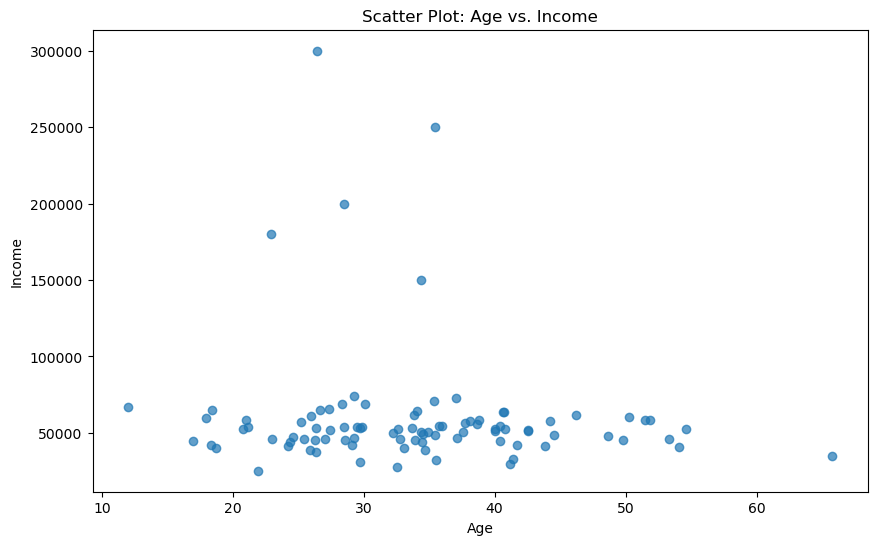

In [24]:
#Scatter plot

import matplotlib.pyplot as plt
import pandas as pd
# Load your dataset
data = pd.read_excel("Demographic Health Dataset2.xlsx", sheet_name="dataset")
# Create a scatter plot for age vs. income
plt.figure(figsize=(10, 6))
plt.scatter(data['age'], data['income'], alpha=0.7)
# Add titles and labels
plt.title('Scatter Plot: Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
# Show the plot
plt.show()

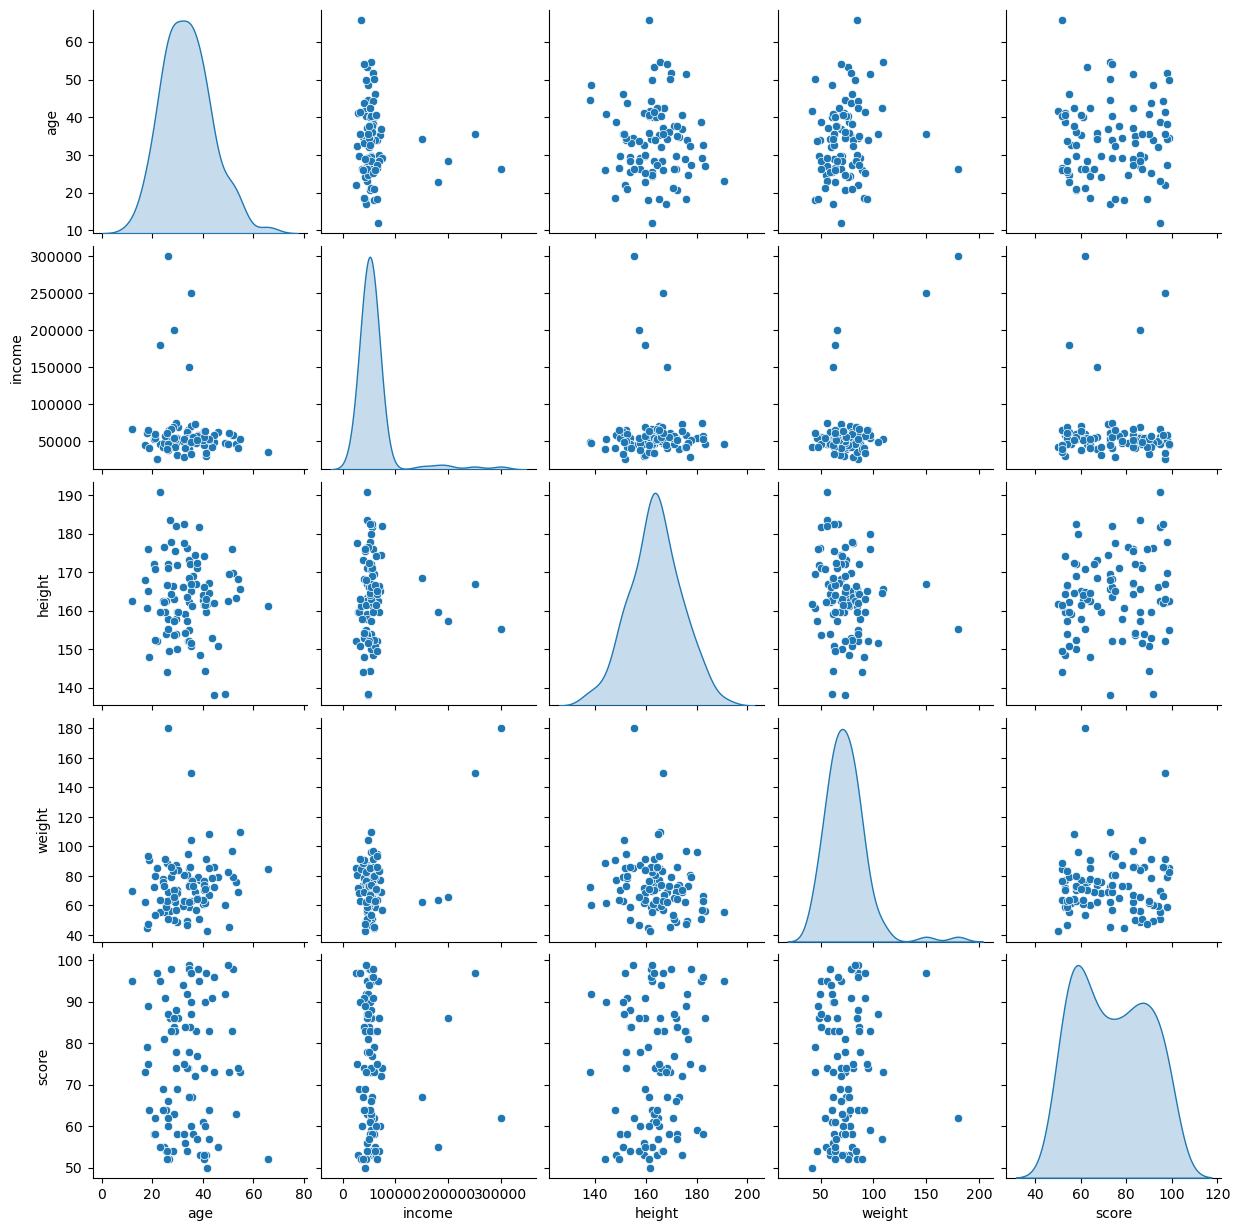

In [26]:
#Pair Plot

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataset
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Create a pair plot
sns.pairplot(data, diag_kind='kde') # diag_kind='kde' adds KDE plots on the diagonal
# Show the plot
plt.show()

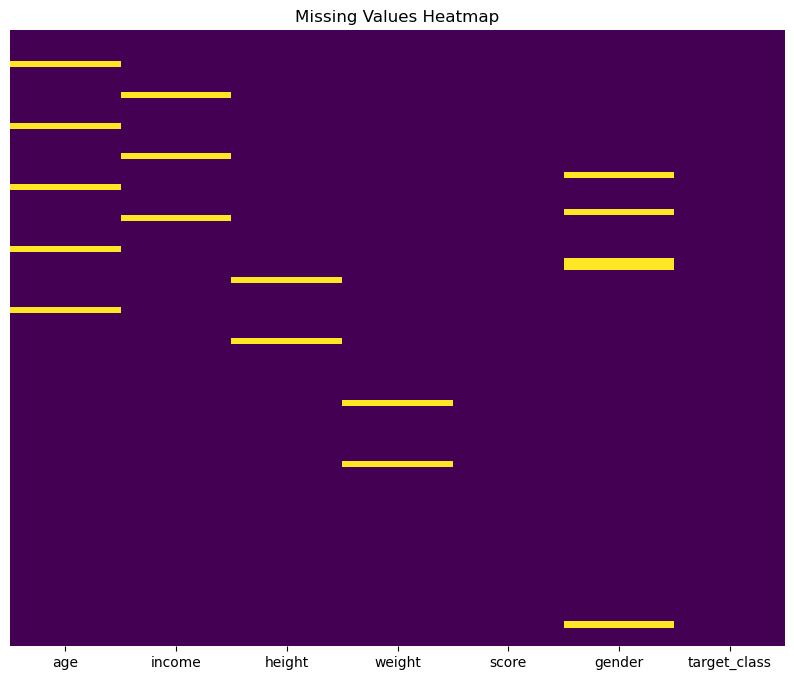

In [27]:
#Heat Map for missing value

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# Load your dataset
data = pd.read_excel("Demographic Health Dataset.xlsx", sheet_name="dataset")
# Step 1: Create a boolean DataFrame that indicates where the missing values are
missing_data = data.isnull()
# Step 2: Create the heatmap for missing values
plt.figure(figsize=(10, 8))
sns.heatmap(missing_data, cmap='viridis', cbar=False, yticklabels=False)
# Add a title to the heatmap
plt.title('Missing Values Heatmap')
# Show the plot
plt.show()